# 2-1. 분류와 회귀

지도학습에는 분류와 회귀가 있습니다.

### 분류
- 다중분류 : 미리 정의된 가능성 있는 여러 클래스 레이블 중 하나를 예측하는 것입니다. chapter 1의 붓꽃이 분류의 예

- 이진 분류 : 질문의 답이 예/아니오만 나올 수 있도록 하는 것.

### 회귀
- 연속적인 숫자, 또는 프로그래밍 용어로 말하면 부동소수점수를 예측하는 것
- 어떤 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측하는 것이 회귀 문제의 한 예

출력 값에 연속성이 있는지 질문해보면 회귀와 분류를 쉽게 구분할 수 있다. 

# 2-2. 일반화, 과대적합, 과소적합

### 일반화 
- 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 일반화 되었다고 합니다.
- 보통 훈련 세트에 대해 정확히 예측하도록 모델을 구축합니다.
- 하지만 예를 들어 아주 복잡한 모델을 만든다면 훈련 세트에만 정확한 모델이 되어버릴 수 있다.

### 과대적합
- 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것을 과대적합이라고 한다
- 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 일어난다.

### 과소적합
- 모델이 너무 간단하면 데이터의 면면과 다양성을 잡아내지 못할 것이고 훈련세트에도 잘 맞지 않을 것이다.


# 2.2.1 모델 복잡도와 데이터셋 크기의 관계

모델의 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련이 깊다.
데이터셋에 다양한 데이터 포인트가 많을수록 과대적합 없이 더 복잡한 모델을 만들 수 있다.

# 2.3 지도 학습 알고리즘

## 2.3.1 예제에 사용할 데이터셋



X.shape : (26, 2)
y.shape : (26,)


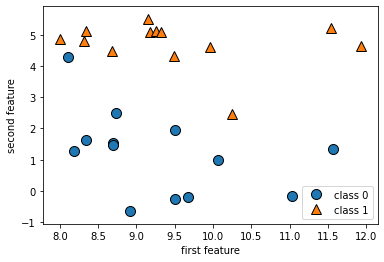

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import warnings
warnings.simplefilter("ignore")

# 데이터셋을 만듭니다(이진 분류 데이터셋)
X, y = mglearn.datasets.make_forge()

# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("first feature")
plt.ylabel("second feature")
print("X.shape :" ,X.shape)
print("y.shape :" ,y.shape)


Text(0, 0.5, 'Target')

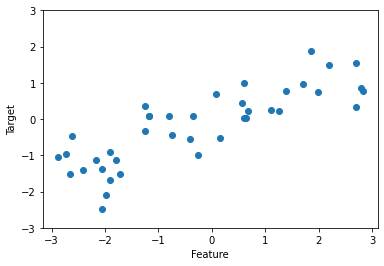

In [2]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [3]:
# 인위적인 데이터셋 외에 실제 데이터셋 두개 사용
# 유방암 데이터 => 분류

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print("cancer data :\n", cancer['data'])
print("===============================")
print("cancer target :\n", cancer['target'])
print("===============================")
print("cancer frame : ", cancer['frame'])
print("===============================")
print("cancer target_names : ", cancer['target_names'])
print("===============================")
print("cancer DESCR : ", cancer['DESCR'])
print("===============================")
print("===============================")
print("cancer filename : ", cancer['filename'])

cancer data :
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
cancer target :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 

In [5]:
print("유방암 데이터의 형태 :", cancer['data'].shape)

유방암 데이터의 형태 : (569, 30)


In [6]:
print("클래스별 샘플 개수 :\n",
     {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수 :
 {'malignant': 212, 'benign': 357}


In [7]:
print("특성 이름 : \n", cancer['feature_names'])

특성 이름 : 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
# 회귀 분석용 보스턴 주택가격 데이터셋 사용

from sklearn.datasets import load_boston
boston = load_boston()

print("데이터의 형태 :", boston.data.shape)

데이터의 형태 : (506, 13)


In [9]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape :", X.shape)

X.shape : (506, 104)


## 2.3.2 k-최근접 이웃

K-NN 알고리즘은 가장 간단한 머신러닝 알고리즘입니다. 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부입니다.

아래의 그림은 forge 데이터셋을 최근접 이웃으로 분류한 것입니다.

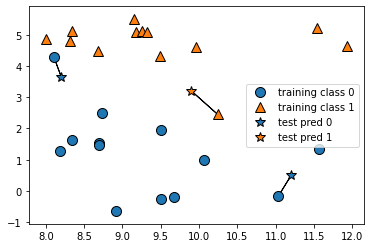

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

가장 가까운 이웃 하나가 아니라 임의의 k개를 선택할 수도 있습니다. 그래서 k-최근접 이웃 알고리즘이라 부릅니다. 둘 이상의 이웃을 선택할 때는 레이블을 정하기 위해 투표를 합니다. 그리고 이웃이 더 많은 클래스를 레이블로 지정합니다.

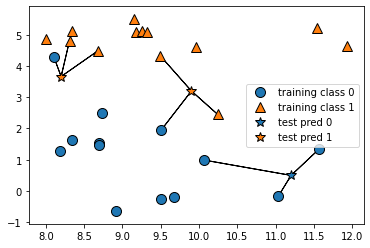

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

이제 scikit-learn을 사용하여 k-최근접 이웃 알고리즘을 어떻게 적용하는지 알아보겠습니다.

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

다음은 KNeighborsClassifier를 임포트하고 객체를 만듭니다. 이때 이웃의 수 같은 매개변수를 지정합니다.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
print("테스트 세트 예측 :", clf.predict(X_test))

테스트 세트 예측 : [1 0 1 0 1 0 0]


모델이 얼마나 잘 일반화 되었는지 평가하기 위해 score메서드에 테스트 데이터와 테스트 레이블을 넣어 호출합니다.

In [16]:
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.86


#### KNeighborsClassifier 분석

2차원 데이터셋이므로 가능한 모든 테스트 포인트의 예측을 xy 평면에 그려볼 수 있습니다. 이렇게 하면 알고리즘이 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 결정 경계(decision boundary)를 볼 수 있습니다.

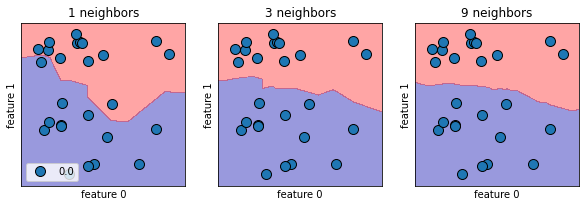

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")  
    
axes[0].legend(loc=3)

위의 그림을 보면 이웃을 적게 선택하면 decision boundary가 훈련 데이터에 가깝게 따라가지만 이웃의 수를 늘릴수록 decision boundary는 더 부드러워집니다. 부드러운 경계는 더 단순한 모델을 의미합니다. 다시말해 이웃을 적게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 모델의 복잡도는 낮아집니다.

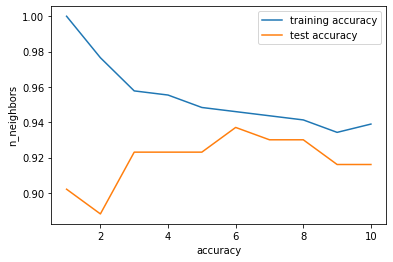

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.xlabel("accuracy")
plt.ylabel("n_neighbors")
plt.legend()

### k-최근접 이웃 회귀

k-최근접 이웃 알고리즘은 회귀 분석에도 쓰입니다.wave 데이터셋을 이용해 이웃이 하나인 최근접 이웃을 사용해보겠습니다

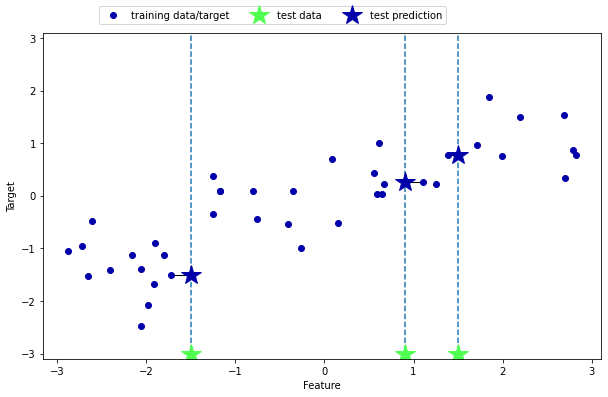

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

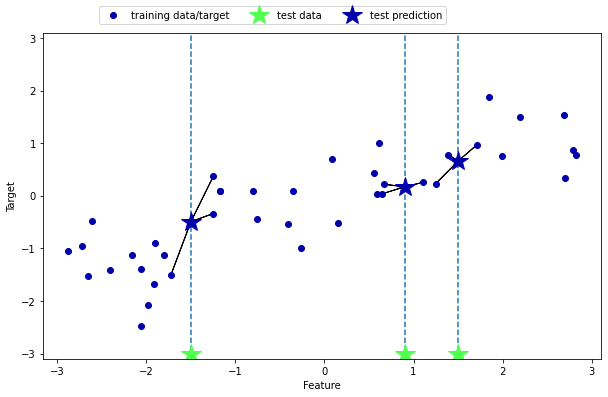

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

scikit-learn에서 회귀를 위한 k-최근접 이웃 알고리즘은 KNeighborsRegressor에 구현되어있습니다.

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors=3)

# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다.
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [22]:
print("테스트 세트 예측 :", reg.predict(X_test))

테스트 세트 예측 : [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [23]:
print("테스트 세트 R^2 : {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2 : 0.83


score 메서드를 사용해 모델을 평가할 때 회귀일 땐 R^2 값을 반환합니다. 이 값은 회귀 모델에서 예측의 적합도를 측정한 값으로 보통 0 과 1 사이의 값입니다.

### KNeighborsRegressor 분석

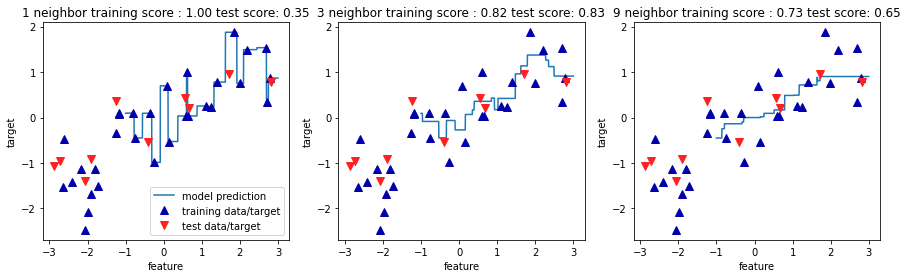

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000개의 데이터 포인트를 만듭니다
line = np.linspace(-1, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)    
    
    ax.set_title(
    "{} neighbor training score : {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
axes[0].legend(["model prediction", "training data/target", "test data/target"], loc="best")

### 장단점과 매개변수

일반적으로 KNeighbors 분류기에 중요한 매개변수는 두 개입니다. 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수 입니다. 보통 최 근접 이웃 모델은 매우 빠르게 만들 수 있지만 훈련 세트가 매우 크면 예측이 느려집니다. k-NN 알고리즘을 사용할 땐 데이터를 전처리 하는 과정이 중요합니다. 그리고 많은 특성을 가진 데이터셋에는 잘 동작하지 않고 특성값 대부분이 0인 데이터셋과는 특히 잘 작동하지 않습니다. 